# Exploratory Data Analysis

Note: Interactive features like plotly won't work on GitHub.com. Use [nbviewer](https://nbviewer.org/github/DATA-606-2023-FALL-MONDAY/Kandlagunta_Dheeraj/blob/main/src/Yelp%20Explorer%20-%202.%20EDA.ipynb) to view.

In [1]:
## Importing Basic Packages
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import re
import logging, warnings
from PIL import Image
pd.set_option('display.max_columns', 50)
warnings.filterwarnings("ignore")

In [2]:
# Import Plotly Packages
import plotly 
import plotly.offline as py
import plotly.graph_objs as go
import plotly_express as px
from plotly.offline import init_notebook_mode, plot, iplot

In [3]:
## sklearn Packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [4]:
# Import NLP Packages
import re
import nltk
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import stylecloud
from textblob import Word, TextBlob

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dheerajk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dheerajk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
data_path = "../../../yelp_dataset/"

## EDA on Restaurants Dataset

In [7]:
# Reading Restaurants CSV File
restaurants_df = pd.read_csv(data_path + "restaurants_dataset.csv")
restaurants_df.drop(['Unnamed: 0'], axis=1, inplace = True)
restaurants_df['categories'].fillna('', inplace=True)
print(restaurants_df.shape)
restaurants_df.head()


(3525, 12)


business_id                name             address  \
0  MTSW4McQd7CbVtyjqoe9mw  St Honore Pastries         935 Race St   
1  MUTTqe8uqyMdBl186RmNeA            Tuna Bar         205 Race St   
2  ROeacJQwBeh05Rqg7F6TCg                 BAP       1224 South St   
3  aPNXGTDkf-4bjhyMBQxqpQ          Craft Hall  901 N Delaware Ave   
4  ppFCk9aQkM338Rgwpl2F5A                Wawa    3604 Chestnut St   

           city state  postal_code   latitude  longitude  stars  review_count  \
0  Philadelphia    PA        19107  39.955505 -75.155564    4.0            80   
1  Philadelphia    PA        19106  39.953949 -75.143226    4.0           245   
2  Philadelphia    PA        19147  39.943223 -75.162568    4.5           205   
3  Philadelphia    PA        19123  39.962582 -75.135657    3.5            65   
4  Philadelphia    PA        19104  39.954573 -75.194894    3.0            56   

   is_open                                         categories  
0        1  Restaurants, Food, Bubble Tea, Coffee & Tea, B...  
1        1                  Sushi Bars, Restaurants, Japanese  
2        1                                Korean, Restaurants  
3        1  Eatertainment, Arts & Entertainment, Brewpubs,...  
4        1  Restaurants, Automotive, Delis, Gas Stations, ...

In [8]:
# Overview of Restaurant Categories
restaurant_categories = restaurants_df.assign(categories = restaurants_df.categories.str.split(', ')).explode('categories')
print(str('The number of unique restaurants categories is:'), len(restaurant_categories))

# Most Common Restaurant Categories
restaurant_categories.categories.value_counts().head(27)[2:]

The number of unique restaurants categories is: 16951


categories
Nightlife                    618
Bars                         586
Sandwiches                   578
Pizza                        529
American (Traditional)       432
Breakfast & Brunch           415
American (New)               372
Coffee & Tea                 366
Chinese                      300
Italian                      279
Fast Food                    259
Burgers                      248
Seafood                      239
Mexican                      208
Event Planning & Services    208
Delis                        200
Cafes                        197
Chicken Wings                180
Salad                        178
Bakeries                     166
Specialty Food               164
Japanese                     133
Asian Fusion                 130
Caterers                     130
Desserts                     122
Name: count, dtype: int64

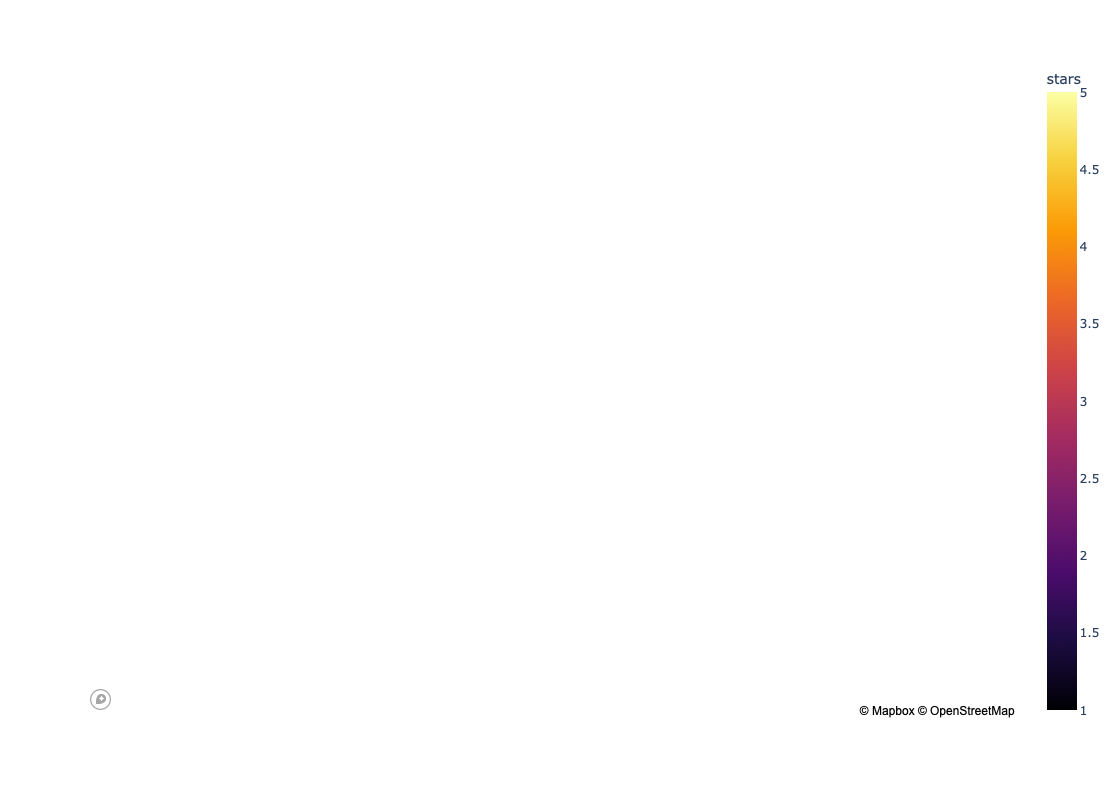

In [9]:
# Geographical Overview of Restaurants in Philadelphia City
px.set_mapbox_access_token('pk.eyJ1IjoiZGhlZXJhanJrIiwiYSI6ImNsbXpmdm50aDFpNzMya3QzeHA3aDM0bGgifQ.PF4WltCX22acurDgpUCb2A')
fig = px.scatter_mapbox(restaurants_df, lat="latitude", lon="longitude", color="stars", size="review_count", 
                        size_max=15, zoom=10, width=1000, height=800, color_continuous_scale="Inferno")
fig.show()

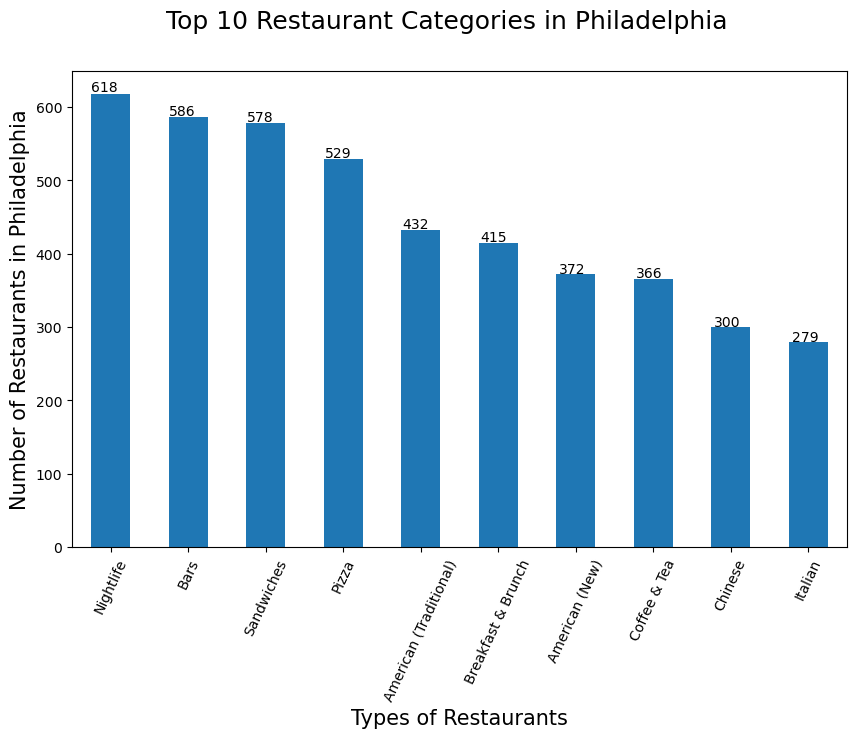

In [10]:
# Distribution of Types of Restaurant Categories 

restaurant_categories = restaurants_df.assign(categories = restaurants_df.categories.str.split(', ')).explode('categories')
top10_categories = restaurant_categories.categories.value_counts().head(12)[2:]

fig, ax = plt.subplots(figsize=(10, 10/1.6180))
fig.suptitle('Top 10 Restaurant Categories in Philadelphia', fontsize=18)
top10_categories.plot(kind='bar', ax=ax)
plt.ylabel('Number of Restaurants in Philadelphia', fontsize=15)
plt.xlabel('Types of Restaurants', fontsize=15)
plt.xticks(rotation=65)

# Adding the numbers on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()


In [11]:
# Overview of 'Pizza' type of Restaurant in Philadelphia
pizza = restaurants_df[restaurants_df['categories'].str.contains("Pizza")]
print(pizza.shape)
pizza.head()

(529, 12)


business_id                             name  \
26  HuDNHqKv9n1mWpe4BqCnwA                      Minas Pizza   
42  Pb5agnsD9EdCl6yuZp2jJA                       O Sole Mio   
46  cLlBDZxYJ1dt1JgMuZnXew                             Olly   
53  bKppmYKQ_-9cpp2yziB-Qw  Lincoln Chicken Pizza And Grill   
63  o4_cgIKWgvJ09TZeSzARmg                    Quality Pizza   

                address          city state  postal_code   latitude  \
26       6151 Ridge Ave  Philadelphia    PA        19128  40.035235   
42     250 Catharine St  Philadelphia    PA        19147  39.937829   
46         700 S 5th St  Philadelphia    PA        19147  39.940878   
53    2614 W Girard Ave  Philadelphia    PA        19130  39.973875   
63  6438 Rising Sun Ave  Philadelphia    PA        19111  40.050921   

    longitude  stars  review_count  is_open  \
26 -75.216793    3.0            54        1   
42 -75.148263    4.5            85        1   
46 -75.151106    4.0            51        1   
53 -75.179424    2.5            20        1   
63 -75.094581    3.0            19        1   

                                           categories  
26                                 Restaurants, Pizza  
42  Food, Seafood, Sardinian, Gelato, Restaurants,...  
46  Pizza, Food, Bagels, Sandwiches, Comfort Food,...  
53    Cheesesteaks, Chicken Wings, Restaurants, Pizza  
63                                 Restaurants, Pizza

In [12]:
pizza.name.value_counts()

name
Domino's Pizza                       13
Pete's Pizza                          6
Papa John's Pizza                     6
Little Caesars Pizza                  4
Little Caesars                        3
                                     ..
Millie's Burgers, Steaks & Shakes     1
Earth Bread + Brewery                 1
Pete's Famous Pizza Restaurant        1
Colonial Pizza                        1
Flip-N-Pizza                          1
Name: count, Length: 480, dtype: int64

We notice several business listings for the pizza restaurant Domino's Pizza. Let's investigate this further.

In [13]:
dominos = pizza[pizza['name'].str.contains("Domino's Pizza")]
dominos.head()


business_id            name                   address  \
70   Yl4Am6NhqWo_YMmo1SyU5A  Domino's Pizza        5754 Baltimore Ave   
91   Utc1KFuFQ-wwLiUTj5FvmA  Domino's Pizza  2308 W Oregon Ave, Ste C   
245  fskPbD8G1DDQbCslHV-v_A  Domino's Pizza       4600 Roosevelt Blvd   
252  CldkS_vTY-vQKYw3LPXpuw  Domino's Pizza            5711 Ridge Ave   
834  -PMXnNJ1D67NkAupRHNkpQ  Domino's Pizza    6391 Oxford Ave, Ste B   

             city state  postal_code   latitude  longitude  stars  \
70   Philadelphia    PA        19143  39.945340 -75.238934    2.0   
91   Philadelphia    PA        19145  39.917871 -75.186959    2.0   
245  Philadelphia    PA        19124  40.029773 -75.099400    2.5   
252  Philadelphia    PA        19128  40.027505 -75.209458    2.0   
834  Philadelphia    PA        19111  40.044236 -75.087194    1.5   

     review_count  is_open                                         categories  
70              5        1                                 Restaurants, Pizza  
91             26        1      Sandwiches, Pizza, Restaurants, Chicken Wings  
245            17        1  Restaurants, Food, Pizza, Sandwiches, Chicken ...  
252            40        1      Pizza, Chicken Wings, Restaurants, Sandwiches  
834            25        1  Restaurants, Pizza, Italian, Chicken Wings, Sa...

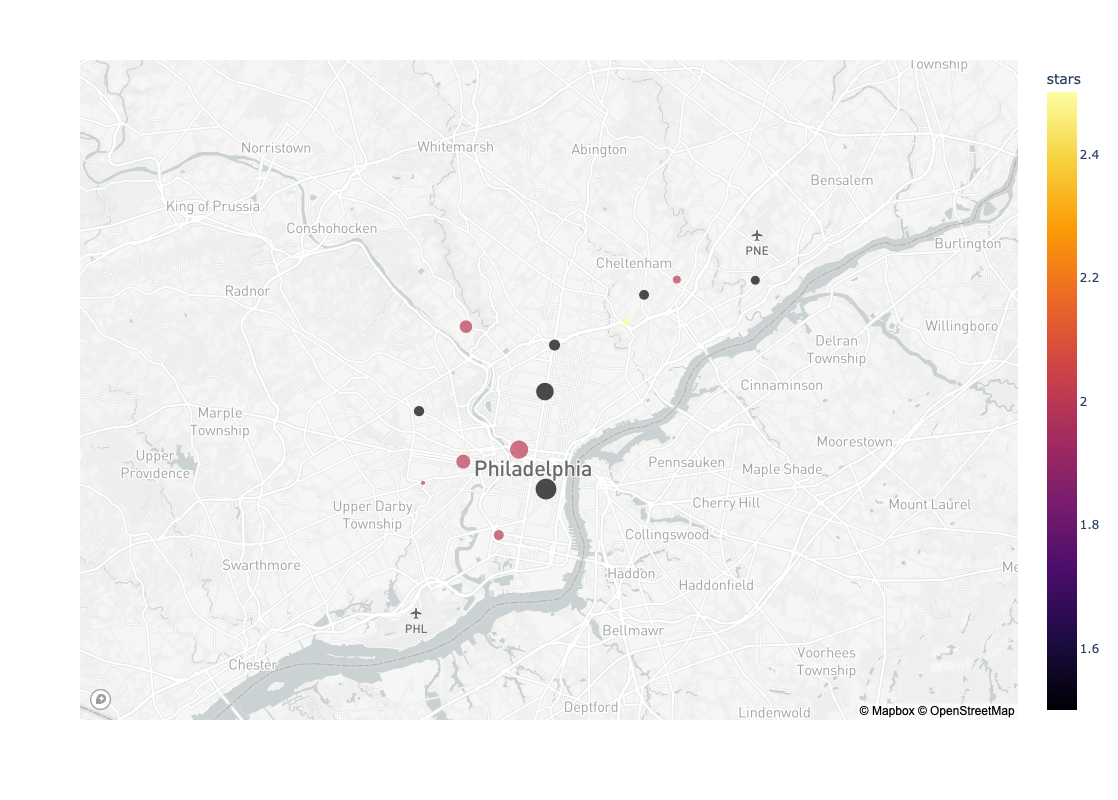

In [14]:
# Geographical Overview of Wawa Outlets in Philadelphia
fig = px.scatter_mapbox(dominos, lat="latitude", lon="longitude", color="stars", size="review_count", 
                        size_max=15, zoom=10, width=1000, height=800, color_continuous_scale="Inferno")
fig.show()

## EDA on Reviews Data

In [15]:
# Reading Reviews dataset CSV File
reviews_df = pd.read_csv(data_path + "reviews_dataset.csv")
reviews_df.drop(['Unnamed: 0'], axis=1, inplace = True)
print(reviews_df.shape)
reviews_df.head()

(345849, 9)


review_id                 user_id             business_id  \
0  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
1  T_kAb2NeylB-JdNDKphryw  Z-xgVb4nM42943m2wbBkFw  kxX2SOes4o-D3ZQBkiMRfA   
2  NENaCqb6TNj5CyY1LOdI6Q  2SEoXb6r6hPKrl9V9VzBgA  kxX2SOes4o-D3ZQBkiMRfA   
3  l-bH0C-PSXmVs-vQqMfJ1Q  toFm0jWZJKqsOmHE7kMbRA  kxX2SOes4o-D3ZQBkiMRfA   
4  qr7acpL3ZzP7cAmXaax93w  cMvau1VAjuKo_ah0ZBck1g  kxX2SOes4o-D3ZQBkiMRfA   

   stars                                               text  \
0    5.0  Wow!  Yummy, different,  delicious.   Our favo...   
1    5.0  We've eaten here 3 times and it seems that eac...   
2    5.0  Came to Philly for a family event but stayed a...   
3    5.0  A very neat little hole in the wall. Very clea...   
4    4.0  This place was a great find. I'd say its a 4.5...   

                  date  year  month      time  
0  2015-01-04 00:01:03  2015      1  00:01:03  
1  2017-01-02 14:25:26  2017      1  14:25:26  
2  2015-07-28 17:15:20  2015      7  17:15:20  
3  2015-06-21 01:11:14  2015      6  01:11:14  
4  2015-12-06 01:36:28  2015     12  01:36:28

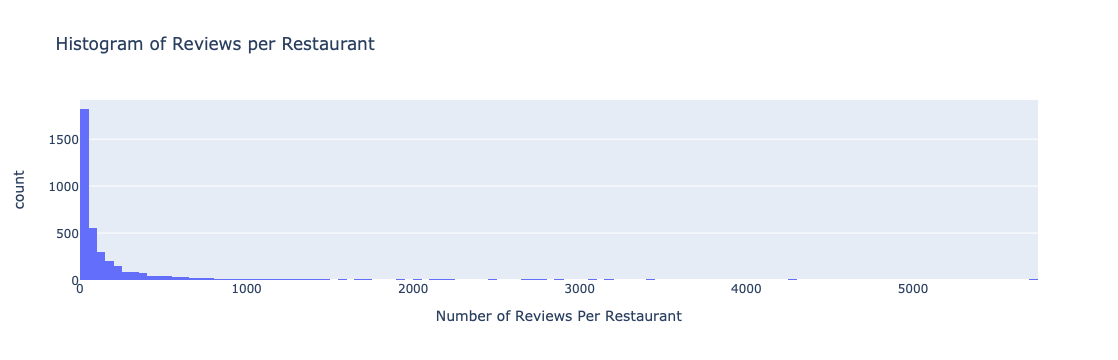

In [16]:
# Sorting Restaurants based on the number of reviews per restaurant
review_count = restaurants_df.sort_values(by = 'review_count', ascending = False)

# Creating a histogram using plotly_express
fig = px.histogram(review_count, x="review_count", 
                   title="Histogram of Reviews per Restaurant",
                   labels={'review_count': 'Number of Reviews Per Restaurant',
                          'count': 'Number of Restaurants'})

# Showing the plot
fig.show()

The distribution is right-skewed, suggesting that the majority of restaurants typically receive a smaller number of reviews, whereas a smaller number of restaurants accumulate a larger number of reviews.

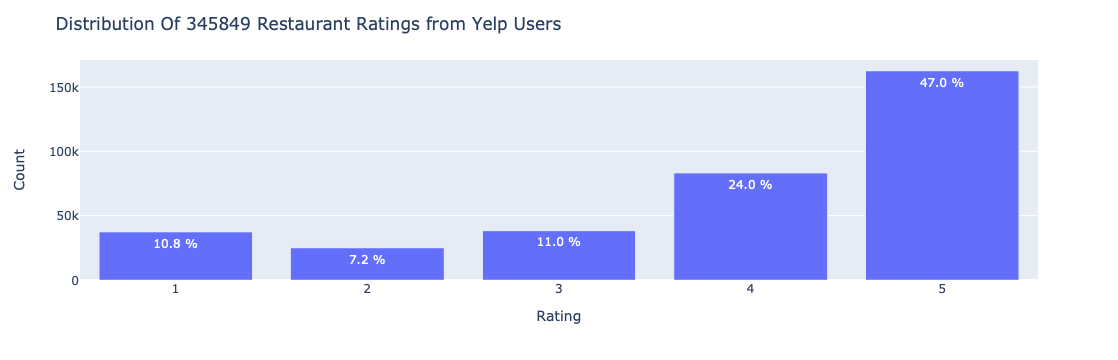

In [17]:
# Overall Distribution of Ratings from Yelp Users

data = reviews_df['stars'].value_counts().sort_index(ascending=False)

fig = px.bar(x=data.index, y=data.values, labels={'x': 'Rating', 'y': 'Count'}, 
             text=['{:.1f} %'.format(val) for val in (data.values / reviews_df.shape[0] * 100)])

fig.update_layout(title='Distribution Of {} Restaurant Ratings from Yelp Users'.format(reviews_df.shape[0]), 
                  xaxis_title='Rating', yaxis_title='Count')

fig.show()


### Sentiment Analysis

In [18]:
reviews_df['text'].head()


0    Wow!  Yummy, different,  delicious.   Our favo...
1    We've eaten here 3 times and it seems that eac...
2    Came to Philly for a family event but stayed a...
3    A very neat little hole in the wall. Very clea...
4    This place was a great find. I'd say its a 4.5...
Name: text, dtype: object

In order to gain a deeper understanding of the information in our reviews dataset, we will analyze the sentiment of the text content in the reviews. This analysis will help us determine the emotional experience of users when dining at various restaurants.

Using the distribution plot of the overall reviews from the previous section, we will categorize negative reviews as those with a Star/Rating of 1 or 2. Positive reviews will be classified as those with a Star/Rating of 5. The remaining reviews, with a Star/Rating of 3 or 4, will be considered neutral.

#### Negative Reviews

In [19]:
# Filtering for negative reviews (one and two star)

negative_review_df = [reviews_df[reviews_df['stars'] == star_rating] for star_rating in [1.0, 2.0]]
negative_reviews = pd.concat(negative_review_df)
print(negative_reviews.shape)
negative_reviews.sample(5)


(62168, 9)


review_id                 user_id  \
334148  9KyKQxsfweQPKdvIhiQRXA  FBSkfs4EeIlL8-jCD7vJ_Q   
257467  o6I8CM0xxnwPTpEo8W45bw  yfa0bZ6zOkaUNCtCe4Pz7g   
112235  zne09naGFjsU4VY7zigUQA  SguGw2CLwbtLkxcOk4phuw   
217781  j-1BSudIQ3yyho_b4CdC4w  bjyaTqkP0x8L75oAT2AZMw   
208819  i5rjVTey5NF4ugB1ftU6RQ  VWEsNC4Q9zhU-cTKWZ2wMA   

                   business_id  stars  \
334148  4tgm6KADoZz_hbukxqK7sA    1.0   
257467  qsm7SkX60JsajT7Yz248FA    1.0   
112235  JrG4NINLspXPNhSXg7Q07Q    1.0   
217781  kZ1q0K13tFYG_ZJrVvsJHA    1.0   
208819  BvW13Bt772-wq6BXiF3nLQ    2.0   

                                                     text  \
334148  I work across the street and after passing by ...   
257467  Worse service ever! Manager suck! I feel bad f...   
112235  I the omelet of the day,   broccoli, mushroom ...   
217781  I come to sampan often; however, today's servi...   
208819  Wasnt hot! Wasnt ready! Dude at the register w...   

                       date  year  month      time  
334148  2015-06-26 13:03:22  2015      6  13:03:22  
257467  2015-03-31 21:33:08  2015      3  21:33:08  
112235  2019-06-09 19:32:57  2019      6  19:32:57  
217781  2017-04-14 23:33:22  2017      4  23:33:22  
208819  2016-10-06 19:27:54  2016     10  19:27:54

We have `62,168` rows of reviews data classified as **Negative Reviews**.

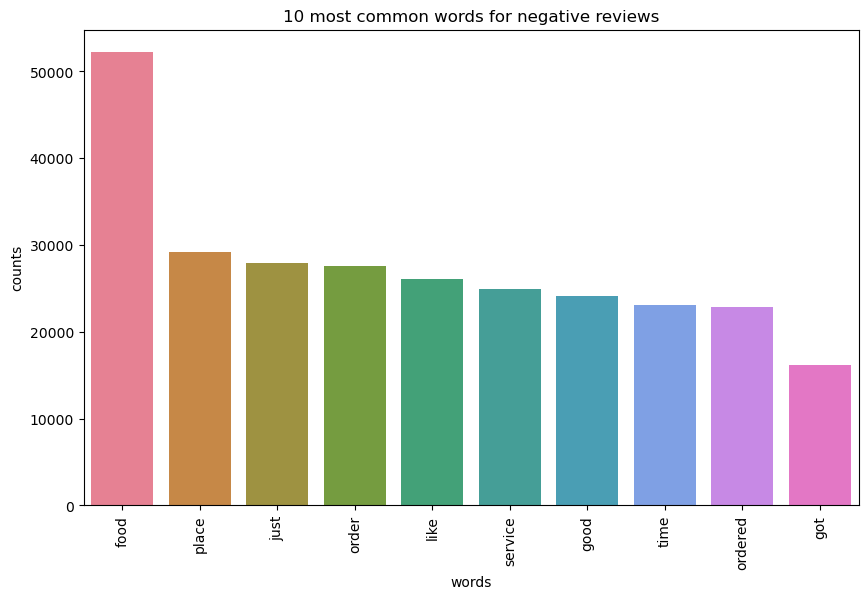

In [20]:
## Sentiment Analysis for Negative Reviews

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the review text
count_data = count_vectorizer.fit_transform(negative_reviews['text'])


feature_names = count_vectorizer.get_feature_names_out()

total_counts = np.zeros(len(feature_names))
for t in count_data:
    total_counts += t.toarray()[0]

count_dict = dict(zip(feature_names, total_counts))

count_dict = sorted(count_dict.items(), key=lambda x: x[1], reverse=True)[:10]

words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]

# Create a bar chart of the 10 most common words
x_pos = np.arange(len(words))
plt.figure(2, figsize=(10, 10/1.6180))
plt.subplot(title='10 most common words for negative reviews')
sns.barplot(x=x_pos, y=counts, palette='husl')
plt.xticks(x_pos, words, rotation=90)
plt.xlabel('words')
plt.ylabel('counts')
plt.show()


In negative reviews, words such as 'food', 'place', 'like' and "good" tend to appear frequently. However, these words alone do not provide much information about the sentiment of the negative reviews. Therefore, we need to eliminate these words before generating our word cloud visualization.

In [21]:
# Let's use the stop_words argument to remove words like "and, the, a"
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

stopwords = stopwords.words('english')
cvec = CountVectorizer(min_df = 2, stop_words= stopwords, max_features = 1000)
cvec.fit(negative_reviews['text'])

# Transforming using the fitted cvec and converting the result to a DataFrame

negative_words = pd.DataFrame(cvec.transform(negative_reviews['text']).todense(),
                       columns=cvec.get_feature_names_out())

negative_top = negative_words.sum(axis = 0).sort_values(ascending = False).head(200)
negative_pd = pd.DataFrame(data=negative_top)
negative_top = negative_words[negative_pd.index]
negative_top.drop(columns=['food', 'place', 'like', 'good'], inplace = True)
negative_top.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dheerajk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


order  service  time  ordered  one  us  would  get  back  even  never  go  \
0      0        0     0        1    0   0      0    0     1     1      0   1   
1      0        0     0        0    0   0      0    0     0     0      0   0   
2      0        1     0        0    0   0      0    0     0     0      0   0   
3      1        0     1        0    0   3      0    0     0     1      0   0   
4      0        0     1        2    0   0      0    0     0     0      0   0   

   got  came  restaurant  said  minutes  asked  chicken  really  told  table  \
0    0     0           0     0        0      0        2       0     0      0   
1    0     1           0     0        0      0        0       0     0      0   
2    0     0           0     0        1      1        0       0     0      0   
3    0     1           0     0        0      0        0       0     0      0   
4    3     1           0     0        0      0        0       0     0      0   

   could  people  also  ...  ordering  need  recommend  actually  bland  soup  \
0      0       0     0  ...         0     0          0         0      0     0   
1      0       0     0  ...         0     0          0         0      0     0   
2      1       0     0  ...         0     0          0         0      0     0   
3      0       0     0  ...         0     0          0         0      0     0   
4      0       0     0  ...         0     0          0         0      0     0   

   fried  party  orders  least  pay  enough  burger  extremely  sat  top  \
0      0      0       0      0    0       0       0          0    0    0   
1      0      0       0      0    0       0       0          0    0    0   
2      0      0       0      0    0       0       0          0    0    0   
3      0      0       0      0    0       0       0          0    0    0   
4      0      0       0      0    0       0       0          0    0    0   

   without  cooked  home  area  wings  served  probably  every  almost  
0        0       0     0     0      0       0         0      0       0  
1        0       0     0     0      0       0         0      0       0  
2        0       0     0     1      0       0         0      0       0  
3        0       0     0     0      0       1         0      0       1  
4        0       0     0     0      0       0         0      0       0  

[5 rows x 196 columns]

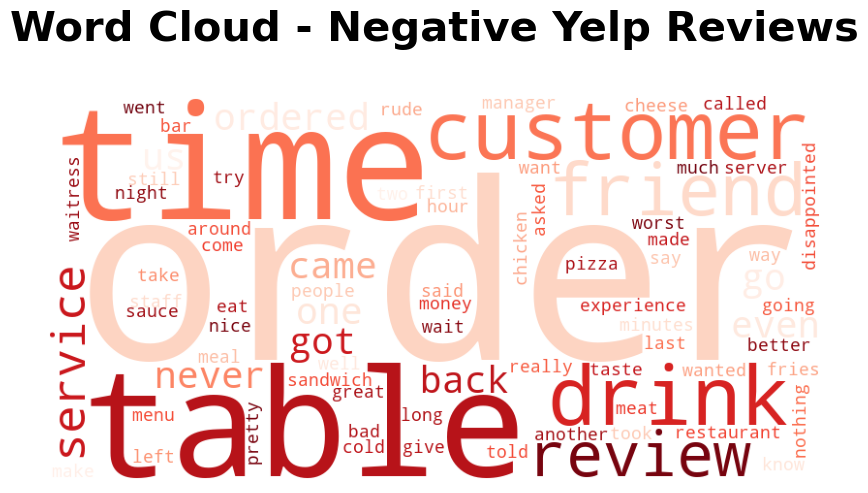

In [22]:
# Create a WordCloud object
wc = WordCloud(max_words=200, min_font_size=10, height=400, width=800, 
               background_color="white", colormap="Reds", font_step=10)
wc.generate(' '.join(negative_top))
fig = plt.figure(figsize=(10, 10/1.6180))
plt.imshow(wc)
plt.axis('off')
plt.title('Word Cloud - Negative Yelp Reviews\n', fontsize=30, weight=600)
plt.show()


In [23]:
# Sorting Restaurants based on number of reviews

negative_reviews['business_id'].value_counts()

business_id
IkY2ticzHEn4QFn8hQLSWg    739
PP3BBaVxZLcJU54uP_wL6Q    610
AGlh4ZDv6jnoiYfz7At9mw    348
6zEWIsb6Lhr3BeoC3gm1lw    327
sTPueJEwcRDj7ZJmG7okYA    282
                         ... 
h1lWjQMjLdAkC-BARvZAZg      1
UVmjxbmreidwhwoFpYaczA      1
c0knN2GfCb8sde71S4ln2Q      1
83Fw7PpQR9GY-IEokD7mmg      1
_i8q9EXNcIMyxXynHDs1rQ      1
Name: count, Length: 3250, dtype: int64

In [24]:
# Restaurant with most negative reviews

worst_business = restaurants_df[restaurants_df['business_id'] == 'IkY2ticzHEn4QFn8hQLSWg']
worst_business

business_id           name        address          city  \
1366  IkY2ticzHEn4QFn8hQLSWg  Geno's Steaks  1219 S 9th St  Philadelphia   

     state  postal_code   latitude  longitude  stars  review_count  is_open  \
1366    PA        19147  39.933837 -75.158814    2.5          3401        1   

                                             categories  
1366  Sandwiches, Cheesesteaks, Steakhouses, Restaur...

In [25]:
# Filtering Reviews from the Worst Restaurant

worst_restaurant_reviews = negative_reviews[negative_reviews['business_id'] == 'IkY2ticzHEn4QFn8hQLSWg']
worst_restaurant_reviews.head()

review_id                 user_id  \
113680  dr9CP173QjAZNlb08Qi-Cg  cCYArHl94nio8-9032ut9A   
113681  cuj8HdMwK42fbGTozDM7Jg  RpxQ6TjGrYmJziVhb-Se3Q   
113686  djVhTlKZw5CrrtjuIpIREQ  I5_vbNbbAyWyzLGV_Ees7Q   
113691  kbfWSLpyIC6XUObA3qRefQ  ALLVYYQ54TADycK1UxadkA   
113697  P8tWu82F5UGUX-8hqUDdVg  T6jCRh9Qi6bzAp-TG2Duvw   

                   business_id  stars  \
113680  IkY2ticzHEn4QFn8hQLSWg    1.0   
113681  IkY2ticzHEn4QFn8hQLSWg    1.0   
113686  IkY2ticzHEn4QFn8hQLSWg    1.0   
113691  IkY2ticzHEn4QFn8hQLSWg    1.0   
113697  IkY2ticzHEn4QFn8hQLSWg    1.0   

                                                     text  \
113680  Total tourist trap.  Super expensive steak umm...   
113681  I cringed just giving this place one star! It ...   
113686  Really??? So disappointed. I have scene this p...   
113691  Was dragged here while the group I visited Phi...   
113697  I don't know what I expected when all my Lyft ...   

                       date  year  month      time  
113680  2015-01-18 22:34:44  2015      1  22:34:44  
113681  2015-10-23 17:20:27  2015     10  17:20:27  
113686  2015-03-19 17:57:52  2015      3  17:57:52  
113691  2015-10-27 17:44:49  2015     10  17:44:49  
113697  2016-03-08 18:49:40  2016      3  18:49:40

In [26]:
# Let's use the stop_words argument to remove words like "and, the, a"

cvec = CountVectorizer(min_df = 2, stop_words= stopwords, max_features = 1000)
cvec.fit(worst_restaurant_reviews['text'])

# Transforming using our fitted cvec and converting the result to a DataFrame

negative_words = pd.DataFrame(cvec.transform(worst_restaurant_reviews['text']).todense(),
                       columns=cvec.get_feature_names_out())

negative_top = negative_words.sum(axis = 0).sort_values(ascending = False).head(300)
negative_pd = pd.DataFrame(data=negative_top)
negative_top = negative_words[negative_pd.index]
negative_top.drop(columns=['food', 'like', 'restaurant', 'place', 'good', 'better', 'great','nice', 'really', 'much', 'one', 'even', 'us', 'got', 'go', 'came'], inplace = True)
negative_top.head()

cheesesteak  cheese  philly  geno  steak  meat  sandwich  pat  bread  get  \
0            0       0       1     0      2     0         0    0      1    0   
1            1       0       0     0      2     0         3    0      0    0   
2            0       1       2     0      0     1         0    0      0    0   
3            1       2       1     0      0     0         0    1      0    1   
4            1       2       1     0      1     1         0    0      1    0   

   would  onions  cheesesteaks  time  try  fries  flavor  first  dry  street  \
0      0       0             0     0    0      0       0      0    0       0   
1      0       0             0     0    1      0       0      0    1       0   
2      0       0             0     0    0      0       1      0    0       0   
3      0       0             0     0    0      2       0      0    0       0   
4      1       1             0     1    0      0       0      0    0       0   

   steaks  pats  line  order  went  ...  husband  overpriced  customers  \
0       0     0     0      0     0  ...        0           0          0   
1       0     0     0      0     0  ...        0           0          0   
2       1     0     0      0     0  ...        0           0          0   
3       0     0     0      0     0  ...        0           0          0   
4       0     0     1      0     0  ...        0           0          0   

   stale  pay  seriously  tastes  special  grease  bun  high  meh  known  \
0      0    0          0       0        0       0    0     0    0      0   
1      0    0          0       0        0       0    0     0    0      0   
2      0    0          0       0        0       0    0     0    0      0   
3      0    0          0       0        0       0    0     0    0      0   
4      0    0          0       1        0       0    0     0    0      0   

   airport  live  small  onion  care  slices  nasty  avoid  makes  warm  \
0        0     0      0      0     0       0      0      0      0     0   
1        0     0      0      0     0       0      0      0      0     0   
2        0     0      0      0     0       0      0      0      0     0   
3        0     0      0      0     0       0      0      0      0     0   
4        0     0      0      0     0       0      0      0      0     0   

   found  end  
0      0    0  
1      0    0  
2      0    0  
3      0    0  
4      0    0  

[5 rows x 284 columns]

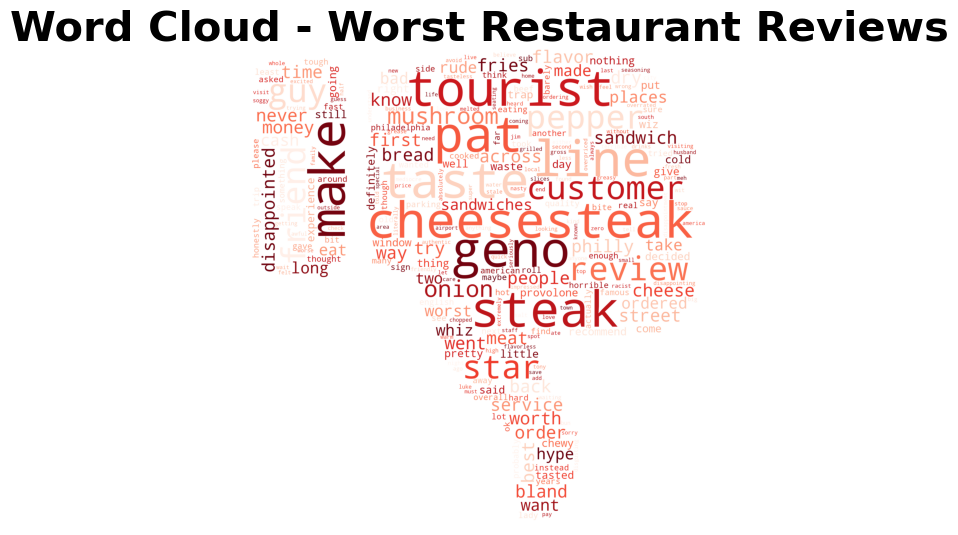

In [27]:
thumbs_down = np.array(Image.open(data_path + 'thumbs-down.jpg'))
wc = WordCloud(max_words=300, min_font_size=10, background_color = 'white', mask = thumbs_down, 
               contour_width = 2, contour_color = '#FFFFFF', colormap = 'Reds')
wc.generate(' '.join(negative_top))
fig = plt.figure(figsize=(10, 10/1.6180))
plt.axis('off')
plt.imshow(wc)
plt.title('Word Cloud - Worst Restaurant Reviews', fontsize=30, weight=600)
plt.show()

#### Positive Reviews

In [28]:
# Filtering for positive reviews (five star)

positive_reviews = reviews_df[reviews_df['stars'] == 5.0]
print(positive_reviews.shape)
positive_reviews.head()

(162441, 9)


review_id                 user_id             business_id  \
0  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
1  T_kAb2NeylB-JdNDKphryw  Z-xgVb4nM42943m2wbBkFw  kxX2SOes4o-D3ZQBkiMRfA   
2  NENaCqb6TNj5CyY1LOdI6Q  2SEoXb6r6hPKrl9V9VzBgA  kxX2SOes4o-D3ZQBkiMRfA   
3  l-bH0C-PSXmVs-vQqMfJ1Q  toFm0jWZJKqsOmHE7kMbRA  kxX2SOes4o-D3ZQBkiMRfA   
5  T4eUUk_WL-m_wbfjczt8WQ  MpIZMLdDjZRu5BzGyEjEOw  kxX2SOes4o-D3ZQBkiMRfA   

   stars                                               text  \
0    5.0  Wow!  Yummy, different,  delicious.   Our favo...   
1    5.0  We've eaten here 3 times and it seems that eac...   
2    5.0  Came to Philly for a family event but stayed a...   
3    5.0  A very neat little hole in the wall. Very clea...   
5    5.0  I love the food, love the owner the lady who w...   

                  date  year  month      time  
0  2015-01-04 00:01:03  2015      1  00:01:03  
1  2017-01-02 14:25:26  2017      1  14:25:26  
2  2015-07-28 17:15:20  2015      7  17:15:20  
3  2015-06-21 01:11:14  2015      6  01:11:14  
5  2016-07-15 01:02:25  2016      7  01:02:25

We have `162,441` rows of reviews data classified as **Positive Reviews**.

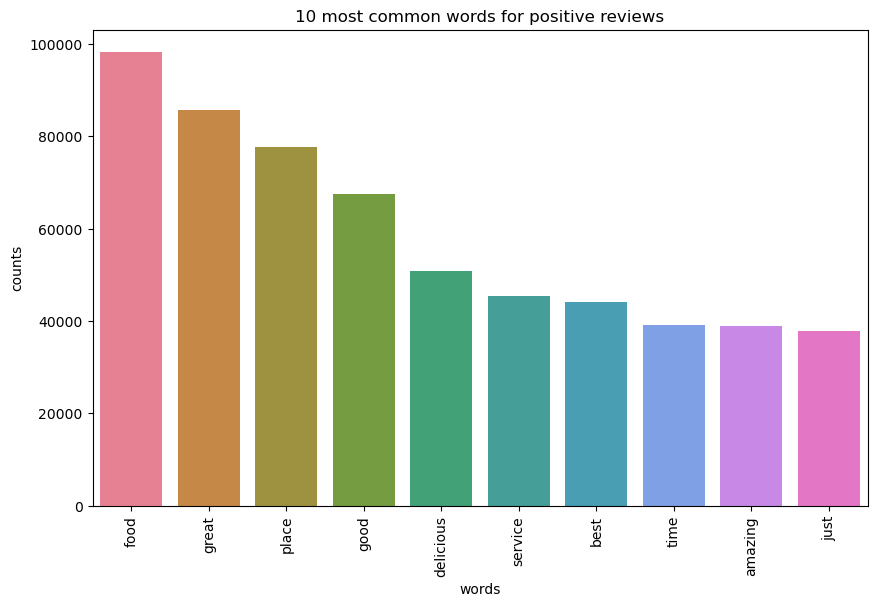

In [29]:
## Sentiment Analysis for Positive Reviews

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the review text
count_data = count_vectorizer.fit_transform(positive_reviews['text'])


feature_names = count_vectorizer.get_feature_names_out()

total_counts = np.zeros(len(feature_names))
for t in count_data:
    total_counts += t.toarray()[0]

count_dict = dict(zip(feature_names, total_counts))

count_dict = sorted(count_dict.items(), key=lambda x: x[1], reverse=True)[:10]

words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]

# Create a bar chart of the 10 most common words
x_pos = np.arange(len(words))
plt.figure(2, figsize=(10, 10/1.6180))
plt.subplot(title='10 most common words for positive reviews')
sns.barplot(x=x_pos, y=counts, palette='husl')
plt.xticks(x_pos, words, rotation=90)
plt.xlabel('words')
plt.ylabel('counts')
plt.show()


In [30]:
# Let's use the stop_words argument to remove words like "and, the, a"
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

stopwords = stopwords.words('english')
cvec = CountVectorizer(min_df = 2, stop_words= stopwords, max_features = 1000)
cvec.fit(positive_reviews['text'])

# Transforming using the fitted cvec and converting the result to a DataFrame

positive_words = pd.DataFrame(cvec.transform(positive_reviews['text']).todense(),
                       columns=cvec.get_feature_names_out())

positive_top = positive_words.sum(axis = 0).sort_values(ascending = False).head(200)
positive_pd = pd.DataFrame(data=positive_top)
positive_top = positive_words[positive_pd.index]
positive_top.drop(columns=['food', 'place', 'like', 'good','great'], inplace = True)
positive_top.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dheerajk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


delicious  service  best  one  also  back  time  amazing  go  get  really  \
0          1        0     0    0     0     0     0        0   1    0       0   
1          0        1     0    0     0     0     3        0   1    0       0   
2          1        0     0    0     0     0     0        0   0    0       0   
3          0        0     0    0     0     1     0        0   0    0       0   
4          0        0     1    0     0     0     0        1   0    1       0   

   definitely  love  philly  chicken  well  restaurant  got  menu  would  \
0           0     0       0        0     0           0    0     0      0   
1           0     0       0        0     0           0    0     0      0   
2           0     0       1        1     0           0    0     0      0   
3           1     0       0        0     0           0    0     0      0   
4           0     2       0        2     0           0    0     0      0   

   ordered  always  try  friendly  nice  ...  inside  dining  selection  give  \
0        0       0    1         0     0  ...       0       0          0     0   
1        0       1    0         0     0  ...       0       0          0     0   
2        0       0    0         0     0  ...       0       0          0     0   
3        0       0    0         0     0  ...       0       0          0     0   
4        0       0    0         0     0  ...       0       0          0     0   

   cream  large  crispy  cake  things  fish  week  vegan  wine  stop  roll  \
0      0      0       0     0       0     0     0      0     0     0     0   
1      0      0       0     0       0     0     0      0     0     0     0   
2      0      0       0     0       0     0     0      0     0     0     0   
3      0      0       0     0       0     0     0      0     0     0     0   
4      0      0       0     0       0     0     0      0     0     0     0   

   years  overall  fun  flavors  took  another  street  chocolate  \
0      0        0    0        0     0        0       0          0   
1      0        0    0        0     0        0       0          0   
2      0        0    0        0     0        0       0          0   
3      0        0    0        0     0        0       0          0   
4      0        0    0        0     0        1       0          0   

   restaurants  especially  
0            0           0  
1            0           0  
2            0           0  
3            0           0  
4            0           0  

[5 rows x 195 columns]

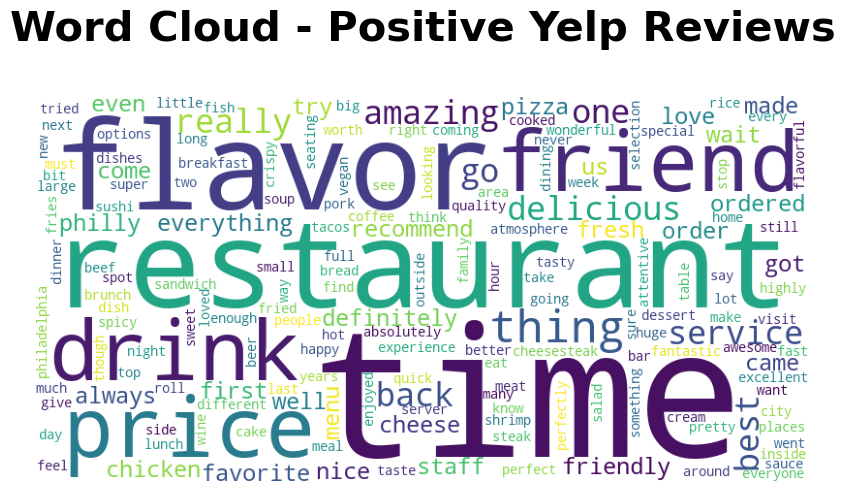

In [31]:
# Create a WordCloud object
wc = WordCloud(min_font_size=10, height=400, width=800, background_color="white", font_step=10)
wc.generate(' '.join(positive_top))
fig = plt.figure(figsize=(10, 10/1.6180))
plt.imshow(wc)
plt.axis("off")
plt.title('Word Cloud - Positive Yelp Reviews\n', fontsize=30, weight=600)
plt.show()


In [32]:
# Sorting Restaurants based on number of reviews

positive_reviews['business_id'].value_counts()

business_id
ytynqOUb3hjKeJfRj5Tshw    2728
ctHjyadbDQAtUFfkcAFEHw    1606
RQAF6a0akMiot5lZZnMNNw    1296
0RuvlgTnKFbX3IK0ZOOocA    1116
6ajnOk0GcY9xbb5Ocaw8Gw    1059
                          ... 
UIzaUKz90UWNHi0vLk5VwQ       1
JiLdxFx_nY5HoQNJbMSh4Q       1
_Mf6thZ3iq30UP8tnkYeRg       1
Iyml-SRyWR_nY_r76wepRw       1
olqTsVDufyeaqXx585Uv2Q       1
Name: count, Length: 3332, dtype: int64

In [33]:
# Restaurants with most positive reviews

best_restaurant = restaurants_df[restaurants_df['business_id'] == 'ytynqOUb3hjKeJfRj5Tshw']
best_restaurant

business_id                     name       address  \
3333  ytynqOUb3hjKeJfRj5Tshw  Reading Terminal Market  51 N 12th St   

              city state  postal_code   latitude  longitude  stars  \
3333  Philadelphia    PA        19107  39.953341 -75.158855    4.5   

      review_count  is_open                                         categories  
3333          5721        1  Candy Stores, Shopping, Department Stores, Fas...

In [34]:
# Filtering Reviews from the Best Restaurant

best_restaurant_reviews = positive_reviews[positive_reviews['business_id'] == 'ytynqOUb3hjKeJfRj5Tshw']
best_restaurant_reviews.head()

review_id                 user_id  \
313692  kKC5pBPkUCWo6mKYFUewRw  mGnZFbk2gqLLtGW-mYo__A   
313693  sFQrhTbTah0o2kU_Pi2D0Q  Tu4ATXLhy8kRTjpQCnl2pA   
313694  kqn1uP3LRVjVDUD44ZSu1A  vRNb2IaGlsZRA_wUf3Ov8w   
313697  dXVhYlcX9X9kqVI16AoBHg  lavyYLh68LxIBhJdIE5f_g   
313698  9CK6oJPgJEqa9pBCAhZxIg  5jMVOTXxWDoGx4iO9q2EPA   

                   business_id  stars  \
313692  ytynqOUb3hjKeJfRj5Tshw    5.0   
313693  ytynqOUb3hjKeJfRj5Tshw    5.0   
313694  ytynqOUb3hjKeJfRj5Tshw    5.0   
313697  ytynqOUb3hjKeJfRj5Tshw    5.0   
313698  ytynqOUb3hjKeJfRj5Tshw    5.0   

                                                     text  \
313692  I love this place! Doesn't take me long to get...   
313693  One of my favorite places to go to in Philly, ...   
313694  This might be a bit unfair to have a single re...   
313697  fresh seafood and produce. fresh breads, chees...   
313698  Reading terminal is always crowded. The food i...   

                       date  year  month      time  
313692  2016-08-25 16:30:53  2016      8  16:30:53  
313693  2016-07-14 20:24:15  2016      7  20:24:15  
313694  2017-04-07 22:27:22  2017      4  22:27:22  
313697  2015-08-19 10:21:14  2015      8  10:21:14  
313698  2017-01-27 22:53:28  2017      1  22:53:28

In [35]:
# Let's use the stop_words argument to remove words like "and, the, a"

cvec = CountVectorizer(min_df = 2, stop_words= stopwords, max_features = 1000)
cvec.fit(best_restaurant_reviews['text'])

# Transforming using our fitted cvec and converting the result to a DataFrame

positive_words = pd.DataFrame(cvec.transform(best_restaurant_reviews['text']).todense(),
                       columns=cvec.get_feature_names_out())

positive_top = positive_words.sum(axis = 0).sort_values(ascending = False).head(300)
positive_pd = pd.DataFrame(data=positive_top)
positive_top = positive_words[positive_pd.index]
positive_top.drop(columns=['food', 'like', 'place', 'good', 'better', 'great','nice', 'really', 'much', 'one', 'even', 'us', 'got', 'go', 'came', 'day', 'time'], inplace = True)
positive_top.head()

market  philly  get  love  terminal  reading  many  fresh  best  eat  \
0       0       0    1     1         0        0     0      0     0    0   
1       0       1    1     1         0        0     0      0     0    0   
2       1       0    0     0         0        0     0      1     1    1   
3       0       0    0     0         0        0     0      2     0    0   
4       0       0    0     0         1        1     0      1     0    0   

   everything  must  visit  places  philadelphia  amazing  produce  try  also  \
0           0     0      0       0             0        0        0    0     0   
1           0     0      0       1             0        0        0    0     0   
2           0     0      0       0             1        0        1    0     0   
3           0     0      0       0             0        0        1    0     0   
4           0     0      0       1             0        0        0    0     0   

   lunch  find  city  want  always  something  ...  part  type  ate  veggies  \
0      0     0     0     0       0          0  ...     0     0    0        0   
1      1     0     0     0       0          0  ...     0     0    0        0   
2      0     0     0     1       0          0  ...     0     0    0        0   
3      1     0     0     0       0          0  ...     0     0    0        0   
4      0     0     0     0       1          0  ...     0     0    0        0   

   downtown  weekend  may  look  give  hershel  doughnuts  quick  thai  pick  \
0         0        0    0     0     0        0          0      0     0     0   
1         0        0    0     0     0        0          0      0     0     0   
2         0        0    0     0     0        0          0      0     0     0   
3         0        0    0     0     0        0          0      0     0     0   
4         0        0    0     0     0        0          0      0     0     0   

   near  pretzel  lived  convention  flowers  usually  plenty  saturday  \
0     0        0      0           0        0        0       0         0   
1     0        0      0           0        0        0       0         0   
2     0        0      0           0        0        0       0         1   
3     0        0      0           0        0        0       0         0   
4     0        0      0           0        0        0       0         0   

   fried  closed  pastries  
0      0       0         0  
1      0       0         0  
2      0       0         0  
3      0       0         0  
4      0       0         0  

[5 rows x 283 columns]

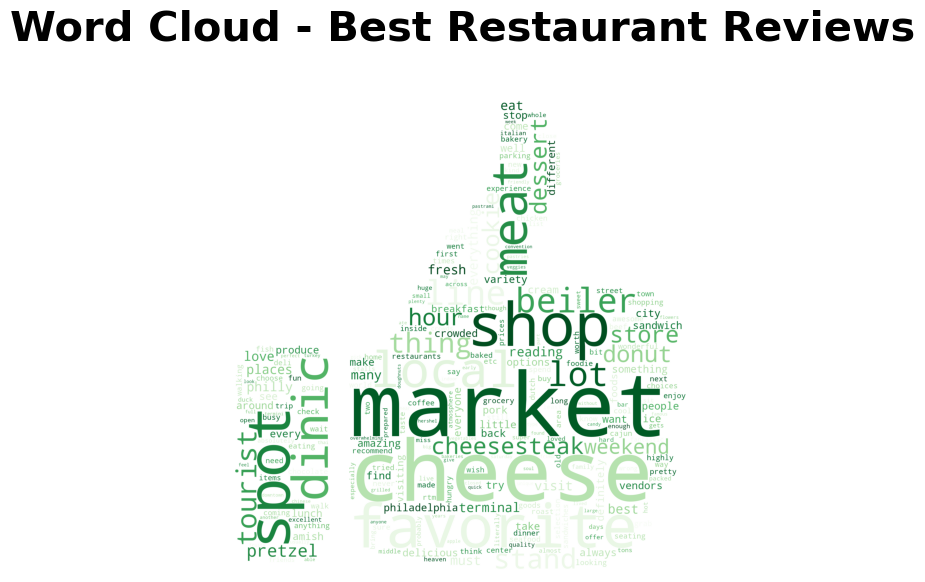

In [36]:
up_mask = np.array(Image.open(data_path + 'thumbs-up.jpg'))
wc = WordCloud(max_words=300, min_font_size=10, background_color = '#FFFFFF', mask = up_mask, contour_width = 2,
     contour_color = '#FFFFFF', colormap = 'Greens')
wc.generate(' '.join(positive_top))
fig = plt.figure(figsize=(10, 10/1.6180))
plt.axis('off')
plt.imshow(wc)
plt.title('Word Cloud - Best Restaurant Reviews\n', fontsize=30, weight=600)
plt.show()

### Creating New Feature Columns

In [37]:
## Creating new feature columns
# Calculate reviews word count

reviews_df['word_count'] = reviews_df['text'].apply(lambda x: len(str(x).split(" ")))

# Calculate reviews character count

reviews_df['char_count'] = reviews_df['text'].str.len()

# Calculate average review length

def avg_word(review):
  words = review.split()
  return (sum(len(word) for word in words) / len(words))

reviews_df['avg_word_len'] = reviews_df['text'].apply(lambda x: avg_word(x))

# Calculate number of stop words in reviews

from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
reviews_df['stopword_count'] = reviews_df['text'].apply(lambda x: len([x for x in x.split() if x in stopwords]))

reviews_df.head()

review_id                 user_id             business_id  \
0  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
1  T_kAb2NeylB-JdNDKphryw  Z-xgVb4nM42943m2wbBkFw  kxX2SOes4o-D3ZQBkiMRfA   
2  NENaCqb6TNj5CyY1LOdI6Q  2SEoXb6r6hPKrl9V9VzBgA  kxX2SOes4o-D3ZQBkiMRfA   
3  l-bH0C-PSXmVs-vQqMfJ1Q  toFm0jWZJKqsOmHE7kMbRA  kxX2SOes4o-D3ZQBkiMRfA   
4  qr7acpL3ZzP7cAmXaax93w  cMvau1VAjuKo_ah0ZBck1g  kxX2SOes4o-D3ZQBkiMRfA   

   stars                                               text  \
0    5.0  Wow!  Yummy, different,  delicious.   Our favo...   
1    5.0  We've eaten here 3 times and it seems that eac...   
2    5.0  Came to Philly for a family event but stayed a...   
3    5.0  A very neat little hole in the wall. Very clea...   
4    4.0  This place was a great find. I'd say its a 4.5...   

                  date  year  month      time  word_count  char_count  \
0  2015-01-04 00:01:03  2015      1  00:01:03          48         243   
1  2017-01-02 14:25:26  2017      1  14:25:26          66         341   
2  2015-07-28 17:15:20  2015      7  17:15:20          28         149   
3  2015-06-21 01:11:14  2015      6  01:11:14          23         131   
4  2015-12-06 01:36:28  2015     12  01:36:28          91         465   

   avg_word_len  stopword_count  
0      4.900000              12  
1      4.246154              26  
2      4.357143              13  
3      4.739130               8  
4      4.120879              32

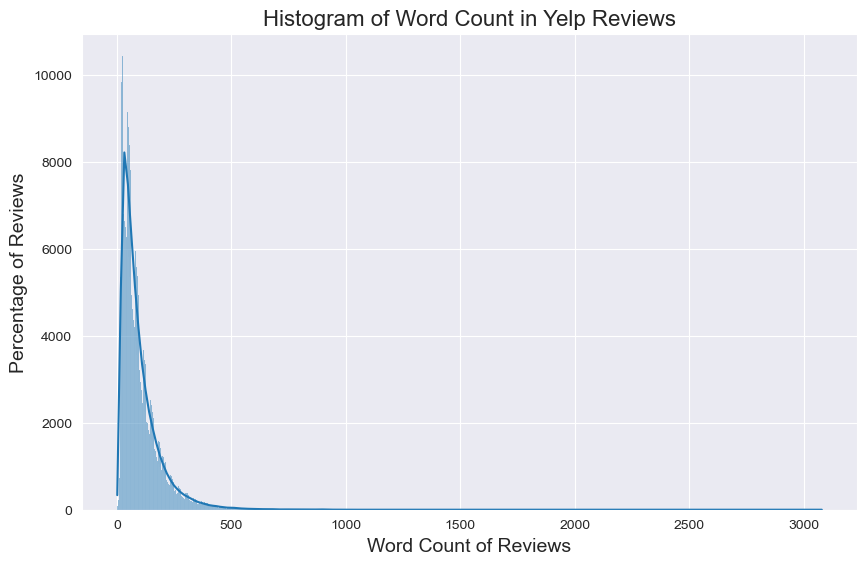

In [38]:
# Histogram of Word Count of Yelp Reviews

sns.set_style("darkgrid")
plt.figure(figsize=(10, 10/1.6180))
sns.histplot(reviews_df['word_count'], kde=True)
plt.title('Histogram of Word Count in Yelp Reviews', fontsize = 16)
plt.xlabel('Word Count of Reviews', fontsize=14)
plt.ylabel('Percentage of Reviews', fontsize=14)
plt.show()

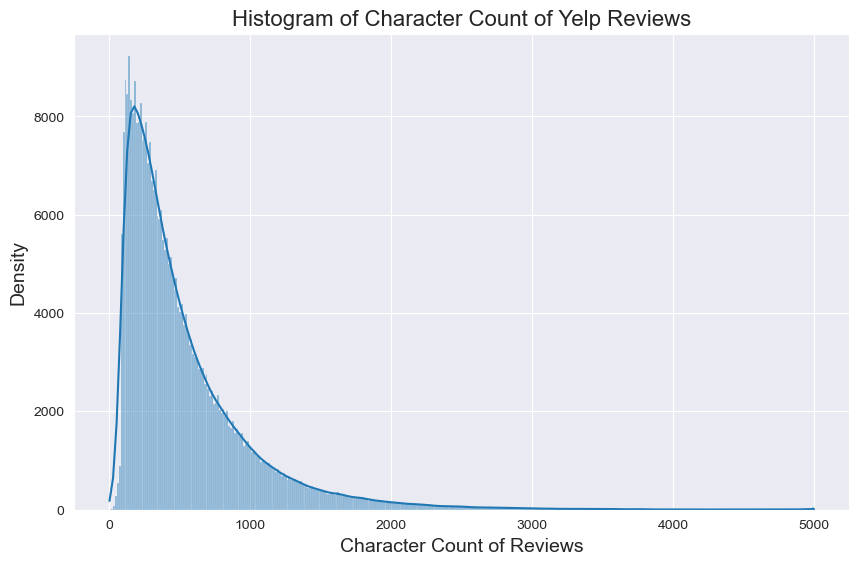

In [39]:
# Histogram of Character Count of Yelp Reviews

sns.set_style("darkgrid")
plt.figure(figsize=(10, 10/1.6180))
sns.histplot(reviews_df['char_count'], kde=True)
plt.title('Histogram of Character Count of Yelp Reviews', fontsize=16)
plt.xlabel('Character Count of Reviews', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()


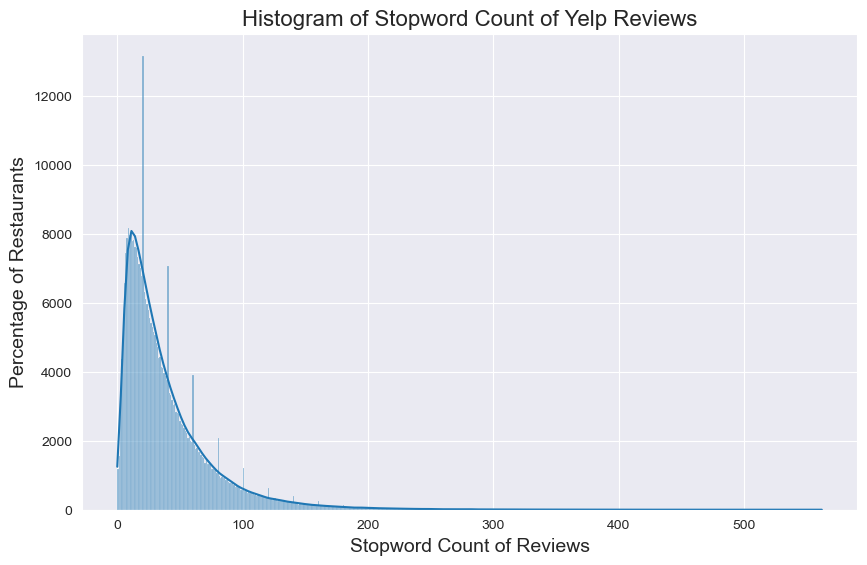

In [40]:
# Histogram of Stopword Count of Yelp Reviews

sns.set_style("darkgrid")
plt.figure(figsize=(10, 10/1.6180))
sns.histplot(reviews_df['stopword_count'], kde=True)
plt.title('Histogram of Stopword Count of Yelp Reviews', fontsize = 16)
plt.xlabel('Stopword Count of Reviews', fontsize=14)
plt.ylabel('Percentage of Restaurants', fontsize=14)
plt.show()

From the given distributions, it is evident that the distributions of word_count, char_count, and stopword_count are **right-skewed**. This indicates that the majority of Yelp Reviews are relatively short. As the length of reviews increases, we observe fewer instances of such lengthy reviews in our dataset.

In [41]:
# Average Word Length of Review for different Stars/Ratings

reviews_df.groupby('stars')['word_count'].mean()

stars
1.0    113.342892
2.0    123.887456
3.0    119.694348
4.0    106.926527
5.0     84.026022
Name: word_count, dtype: float64

In [42]:
stars_wordcount = reviews_df.groupby('stars')['word_count'].mean()
stars_wordcount = stars_wordcount.to_frame(name = 'sum').reset_index()
stars_wordcount

stars         sum
0    1.0  113.342892
1    2.0  123.887456
2    3.0  119.694348
3    4.0  106.926527
4    5.0   84.026022

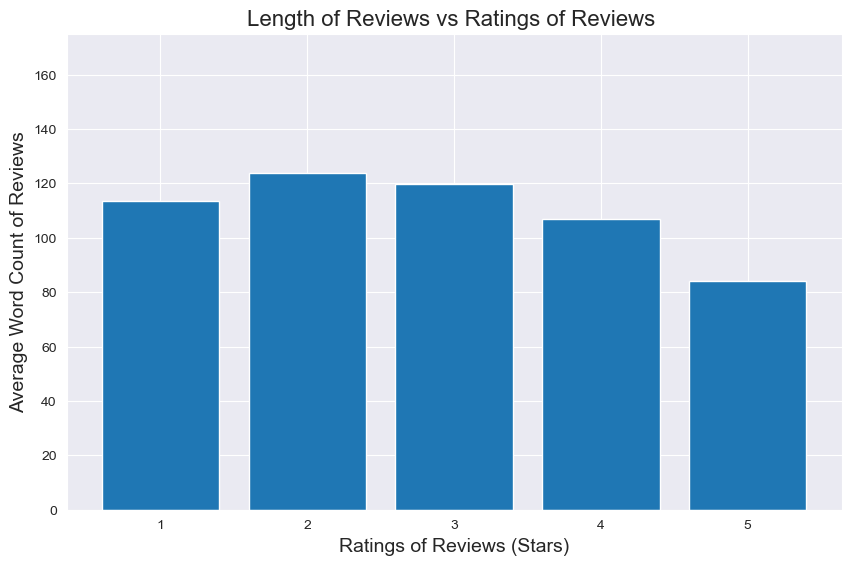

In [43]:
# Distribution of Length of Reviews vs Ratings of Reviews

sns.set_style("darkgrid")
plt.figure(figsize=(10, 10/1.6180))
plt.bar(stars_wordcount['stars'],stars_wordcount['sum'])
plt.title('Length of Reviews vs Ratings of Reviews ', fontsize = 16)
plt.xlabel('Ratings of Reviews (Stars)', fontsize=14)
plt.ylabel('Average Word Count of Reviews', fontsize=14)
plt.ylim((0,175))
plt.show()

According to the distribution plot, negative reviews (rated 1 and 2 Stars) tend to have a higher average word length compared to positive reviews (rated 5 Stars).

In [44]:
# Save cleaned reviews dataframe into csv file
reviews_df.to_csv(data_path + "reviews_eda.csv")